In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [32]:
!ls /kaggle/input/titanic/

gender_submission.csv  test.csv  train.csv


In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train_orig = train.copy()
test_orig = test.copy()
submission_orig = submission.copy()

In [35]:
train.shape, test.shape, train.index, test.index

((891, 12),
 (418, 11),
 RangeIndex(start=0, stop=891, step=1),
 RangeIndex(start=0, stop=418, step=1))

In [36]:
train.columns.difference(test.columns), train.columns.intersection(submission.columns)

(Index(['Survived'], dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

In [37]:
train.duplicated().sum(), test.duplicated().sum()
# there are no duplicate rows in both train n test

(0, 0)

In [38]:
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test])
data_orig = data.copy()
data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked source  
0      0         A/5 21171   7.2500   NaN        S  train  
1      0          PC 17599  71.2833   C85        C  train  
2      0  STON/O2. 3101282   7.9250   NaN        S  train  
3      0            113803  53.1000  C123        S  train  
4      0            373450   8.0500   NaN        S  train

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [40]:
submission.shape, submission.index, submission.duplicated().sum(), submission.head()

((418, 2),
 RangeIndex(start=0, stop=418, step=1),
 0,
    PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1)

In [41]:
submission['Survived'].value_counts(),submission.isna().sum()

(0    266
 1    152
 Name: Survived, dtype: int64,
 PassengerId    0
 Survived       0
 dtype: int64)

In [42]:
#submission.to_csv("asis_submission.csv")
# sumitting asis = 0.76555
#0    266
#1    152

In [44]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [47]:
display(data[data['source']=="train"].isna().sum())
display(data.drop(columns='Survived').isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
source           0
dtype: int64

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [51]:
''' not working 
data[data.drop(columns='Survived').isna()]
data.isna()
'''

" not working \ndata[data.drop(columns='Survived').isna()]\ndata.isna()\n"

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [54]:
train.shape, test.shape, data.shape, data.index

((891, 13),
 (418, 12),
 (1309, 13),
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
            dtype='int64', length=1309))

In [62]:
data = data.reset_index().drop(columns=['index','level_0'])
data.index


RangeIndex(start=0, stop=1309, step=1)

In [63]:
data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked source  
0         0           A/5 21171    7.2500   NaN        S  train  
1         0            PC 17599   71.2833   C85        C  train  
2         0    STON/O2. 3101282    7.9250   NaN        S  train  
3         0              113803   53.1000  C123        S  train  
4         0              373450    8.0500   NaN        S  train  
...     ...                 ...       ...   ...      ...    ...  
1304      0           A.5. 3236    8.0500   NaN        S   test  
1305      0            PC 17758  108.9000  C105        C   test  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S   test  
1307      0              359309    8.0500   NaN        S   test  
1308      1                2668   22.3583   NaN        C   test  

[1309 rows x 13 columns]

In [64]:
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
source            2
dtype: int64

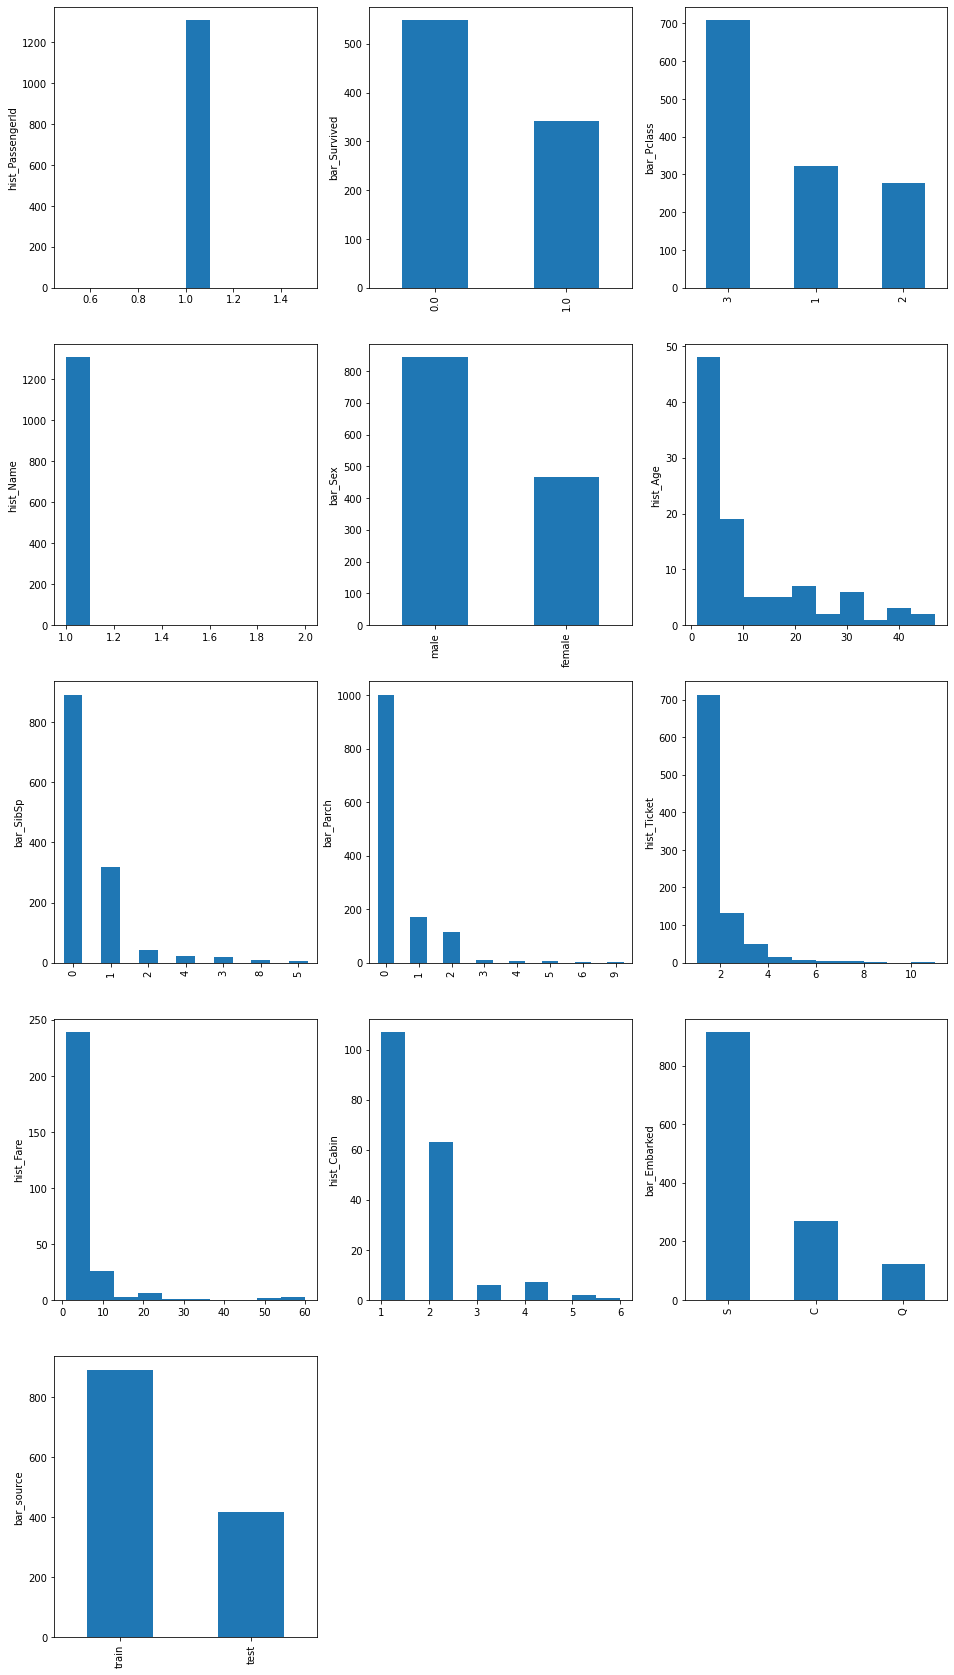

In [65]:
%matplotlib inline
plt.figure(figsize=(16,30))
k=1
col_cnt = 3
row_cnt = int(np.ceil(len(data.columns)/3))
for col in data.columns:
    plt.subplot(row_cnt,col_cnt,k)
    if data[col].nunique()<25: 
        title='bar'
        data[col].value_counts().plot(kind ='bar')
    else: 
        title='hist'
        data[col].value_counts().plot(kind ='hist')
    #plt.title(title+'_'+col)
    plt.ylabel(title+'_'+col)    
    k+=1
plt.show()

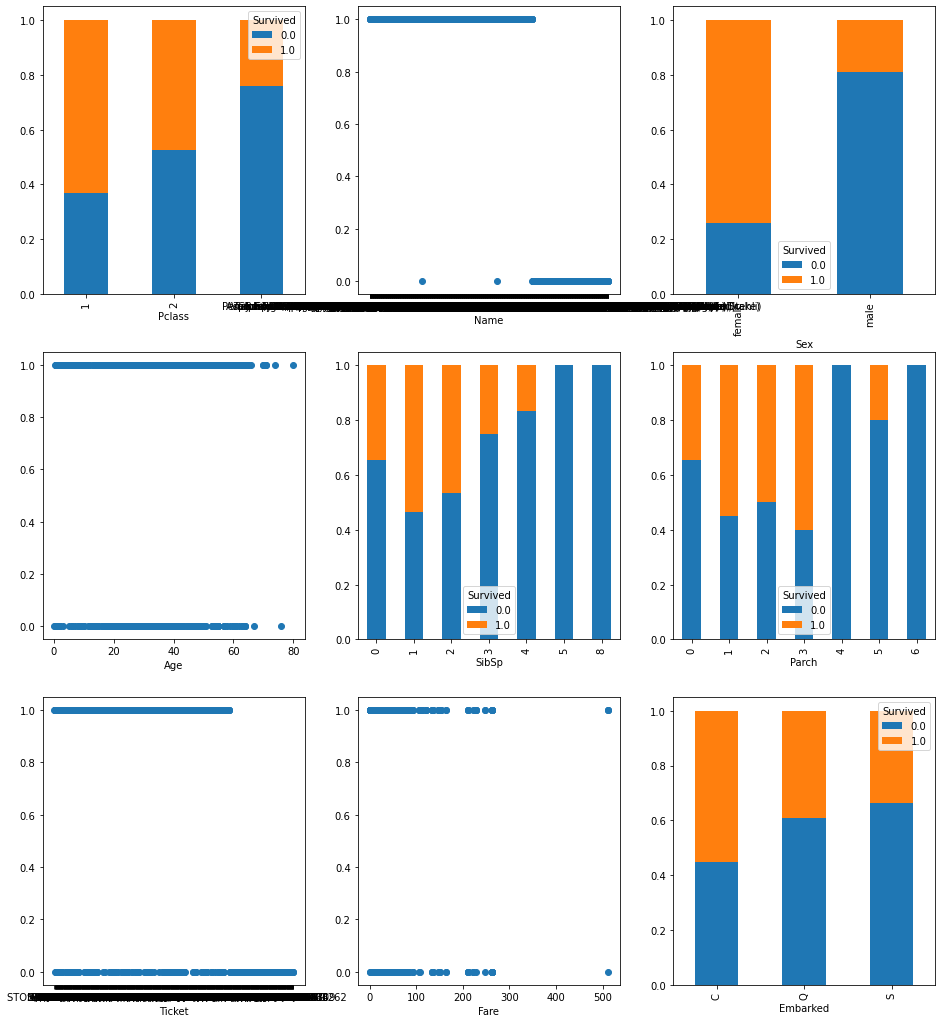

In [68]:
%matplotlib inline
j=k=0
col_cnt = 3
j=[idx for idx, col in enumerate(data.drop(columns=['PassengerId','Survived','source','Cabin']).columns) if(data[col].nunique()<25) ]
j=len(j)
row_cnt = int(np.ceil(j/3))
row_cnt+=1

fig, ax = plt.subplots(ncols=col_cnt, nrows=row_cnt, figsize=(16, row_cnt*6))
ax = ax.flatten()
tgt_var = train.columns.difference(test.columns).values[0]

for idx, col in enumerate(data.drop(columns=['PassengerId','Survived','source','Cabin']).columns) : 
    if data[col].nunique()<25 : 
        cross = pd.crosstab(data[col],data[tgt_var])      
        cross.div(cross.sum(1), axis=0).plot(kind='bar', stacked=True, ax=ax[k])
        #plt.title(col)  
    else :
        plt.subplot(row_cnt,col_cnt,k+1)
        print()
        plt.scatter(x=data[col], y=data[tgt_var].notnull())
        plt.xlabel(col) 
    k+=1        
plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [69]:
data.describe().T

count        mean         std   min       25%       50%  \
PassengerId  1309.0  655.000000  378.020061  1.00  328.0000  655.0000   
Survived      891.0    0.383838    0.486592  0.00    0.0000    0.0000   
Pclass       1309.0    2.294882    0.837836  1.00    2.0000    3.0000   
Age          1046.0   29.881138   14.413493  0.17   21.0000   28.0000   
SibSp        1309.0    0.498854    1.041658  0.00    0.0000    0.0000   
Parch        1309.0    0.385027    0.865560  0.00    0.0000    0.0000   
Fare         1308.0   33.295479   51.758668  0.00    7.8958   14.4542   

                 75%        max  
PassengerId  982.000  1309.0000  
Survived       1.000     1.0000  
Pclass         3.000     3.0000  
Age           39.000    80.0000  
SibSp          1.000     8.0000  
Parch          0.000     9.0000  
Fare          31.275   512.3292

In [71]:
data.describe(exclude=[np.float64,np.int64])

Name   Sex    Ticket        Cabin Embarked source
count                   1309  1309      1309          295     1307   1309
unique                  1307     2       929          186        3      2
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S  train
freq                       2   843        11            6      914    891

In [72]:
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
source            2
dtype: int64

In [76]:
data = data.drop(columns = ['Name','Ticket','Cabin'])
#data['Cabin'].apply(lambda x: print(x))

In [77]:
data

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
0               1       0.0       3    male  22.0      1      0    7.2500   
1               2       1.0       1  female  38.0      1      0   71.2833   
2               3       1.0       3  female  26.0      0      0    7.9250   
3               4       1.0       1  female  35.0      1      0   53.1000   
4               5       0.0       3    male  35.0      0      0    8.0500   
...           ...       ...     ...     ...   ...    ...    ...       ...   
1304         1305       NaN       3    male   NaN      0      0    8.0500   
1305         1306       NaN       1  female  39.0      0      0  108.9000   
1306         1307       NaN       3    male  38.5      0      0    7.2500   
1307         1308       NaN       3    male   NaN      0      0    8.0500   
1308         1309       NaN       3    male   NaN      1      1   22.3583   

     Embarked source  
0           S  train  
1           C  train  
2           S  train  
3           S  train  
4           S  train  
...       ...    ...  
1304        S   test  
1305        C   test  
1306        S   test  
1307        S   test  
1308        C   test  

[1309 rows x 10 columns]

In [82]:
type(data.nunique()), type(data.value_counts()), type(data.isna().sum()), type(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
 9   source       1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 NoneType)

In [87]:
data.nunique(), data.value_counts(), data.isna().sum(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
 9   source       1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


(PassengerId    1309
 Survived          2
 Pclass            3
 Sex               2
 Age              98
 SibSp             7
 Parch             8
 Fare            281
 Embarked          3
 source            2
 dtype: int64,
 PassengerId  Survived  Pclass  Sex     Age    SibSp  Parch  Fare      Embarked  source
 1            0.0       3       male    22.00  1      0      7.2500    S         train     1
 622          1.0       1       male    42.00  1      0      52.5542   S         train     1
 595          0.0       2       male    37.00  1      0      26.0000   S         train     1
 596          0.0       3       male    36.00  1      1      24.1500   S         train     1
 598          0.0       3       male    49.00  0      0      0.0000    S         train     1
                                                                                          ..
 298          0.0       1       female  2.00   1      2      151.5500  S         train     1
 300          1.0       1       fema

In [164]:
def combinfo(data) :
    combi = pd.DataFrame(data.nunique(),columns=['Nunique()'])
    combi2 = pd.DataFrame(data.isna().sum(),columns=['isna() count'])
    combi3 = pd.concat([combi, combi2],axis=1)

    import io
    buffer = io.StringIO()
    data.info(buf=buffer, memory_usage=False)
    s = buffer.getvalue()
    df = pd.DataFrame(s.split("\n"),columns=['info'])
    df_info = df.loc[5:len(data.columns)+5-1,'info'].str.split(n=4,expand=True).reset_index(drop=True)
    df_info.drop(columns=[0,3],axis=1,inplace=True)
    df_info.columns = ['Column','Non-Null count','Dtype']
    df_info.set_index('Column',inplace=True)

    combi5 = pd.concat([combi3, df_info],axis=1)
    return combi5

In [149]:
import io
buffer = io.StringIO()
data.info(buf=buffer, memory_usage=False)
s = buffer.getvalue()
df = pd.DataFrame(s.split("\n"),columns=['info'])
df_info = df.loc[5:len(data.columns)+5-1,'info'].str.split(n=4,expand=True).reset_index(drop=True)
df_info.drop(columns=[0,3],axis=1,inplace=True)
df_info.columns = ['Column','Non-Null count','Dtype']
print(df_info)


        Column Non-Null count    Dtype
0  PassengerId           1309  int64  
1     Survived            891  float64
2       Pclass           1309  int64  
3          Sex           1309  object 
4          Age           1046  float64
5        SibSp           1309  int64  
6        Parch           1309  int64  
7         Fare           1308  float64
8     Embarked           1307  object 
9       source           1309  object 


In [173]:
combinfo(data)

Nunique()  isna() count Non-Null count    Dtype
PassengerId       1309             0           1309  int64  
Survived             2           418            891  float64
Pclass               3             0           1309  int64  
Sex                  2             0           1309  object 
Age                 98           263           1046  float64
SibSp                7             0           1309  int64  
Parch                8             0           1309  int64  
Fare               281             1           1308  float64
Embarked             3             2           1307  object 
source               2             0           1309  object

In [198]:
data["Sex_num"] = data["Sex"].replace({"male":1, "female":0})
data["Embarked_num"] = data["Embarked"].replace({"S":1, "C":2, "Q":3})
#data["Fare"] = data["Fare"].fillna(data[(data['Pclass']==3)]['Fare'].median())
#data['Age'].value_counts()


In [203]:
data["Embarked_num"].value_counts(), data["Embarked_num"].mode()[0]
display(data[data.Embarked_num.isna()])

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked  \
61            62       1.0       1  female  38.0      0      0  80.0      NaN   
829          830       1.0       1  female  62.0      0      0  80.0      NaN   

    source  Sex_num  Embarked_num  
61   train        0           NaN  
829  train        0           NaN

In [229]:
# Fare - analysis
display(data.groupby(['Pclass','Sex']).mean()['Fare'])
display(data.groupby(['Pclass','Sex']).median()['Fare'])
#display(data.groupby(['Pclass','Sex']).median()['Fare'].filter('Pclass==3 & Sex=="male"'))
display(data.groupby(['Pclass','Sex']).median()['Fare'])#.filter(lamda x: )
print('@'*10)
display(data['Fare'].describe())
display(data[data.Fare.isna()])
display(data[(data['Pclass']==3)]['Fare'].describe())#, data[(data['Pclass']==3)]['Fare'].median())


Pclass  Sex   
1       female    109.412385
        male       69.888385
2       female     23.234827
        male       19.904946
3       female     15.324250
        male       12.415462
Name: Fare, dtype: float64

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

@@@@@@@@@@


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked  \
1043         1044       NaN       3  male  60.5      0      0   NaN        S   

     source  Sex_num  Embarked_num  
1043   test        1           1.0

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: Fare, dtype: float64

In [172]:
data['SibSp'].value_counts(), data['Parch'].value_counts(), data['Embarked'].value_counts()

(0    891
 1    319
 2     42
 4     22
 3     20
 8      9
 5      6
 Name: SibSp, dtype: int64,
 0    1002
 1     170
 2     113
 3       8
 4       6
 5       6
 6       2
 9       2
 Name: Parch, dtype: int64)